Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Poop



Import Libraries & get url


In [1]:
url = 'https://data.sfgov.org/resource/knuv-efkr.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [3]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



### get url

In [5]:
df = pd.read_csv(url)


In [6]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606706,12/07/2016 11:36:19 PM,NaN,12/07/2016 11:36:19 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of DUBOCE AVE and NOE ST,8.0,Duboce Triangle,"(37.7691784266852, -122.433572372998)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58490d663da19793c74c3854/report.jpg
1,6606662,12/07/2016 10:42:38 PM,NaN,12/07/2016 10:42:38 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,"250 CLARA ST, SAN FRANCISCO, CA, 94107",6.0,South of Market,"(37.778699872824, -122.403449455704)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584900d33da19793c74c3831/photo_20161207_223513.jpg
2,6606591,12/07/2016 09:20:09 PM,NaN,12/07/2016 09:20:09 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of BRYANT ST and MAIN ST,6.0,South Beach,"(37.7868986102984, -122.38877960071)",Open311,NaN


In [7]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [8]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6606706,2016-12-07 23:36:19,NaT,2016-12-07 23:36:19,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of DUBOCE AVE and NOE ST,8.0,Duboce Triangle,"(37.7691784266852, -122.433572372998)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58490d663da19793c74c3854/report.jpg
1,6606662,2016-12-07 22:42:38,NaT,2016-12-07 22:42:38,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,"250 CLARA ST, SAN FRANCISCO, CA, 94107",6.0,South of Market,"(37.778699872824, -122.403449455704)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/584900d33da19793c74c3831/photo_20161207_223513.jpg
2,6606591,2016-12-07 21:20:09,NaT,2016-12-07 21:20:09,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of BRYANT ST and MAIN ST,6.0,South Beach,"(37.7868986102984, -122.38877960071)",Open311,NaN


In [9]:
df.Closed.dt.day.value_counts().sort_index()

1.0     89
2.0     54
3.0     42
4.0     31
5.0     49
6.0     72
7.0     61
8.0     14
18.0    16
19.0     4
20.0    12
21.0    11
22.0    24
23.0    14
24.0    14
25.0    16
26.0    34
27.0    68
28.0    15
29.0    30
30.0    66
Name: Closed, dtype: int64

In [10]:
df.Opened.dt.day.value_counts().sort_index()

1     64
2     36
3     47
4     41
5     86
6     71
7     50
18    50
19    17
20    19
21    67
22    68
23    47
24    14
25    48
26    27
27    37
28    71
29    75
30    65
Name: Opened, dtype: int64

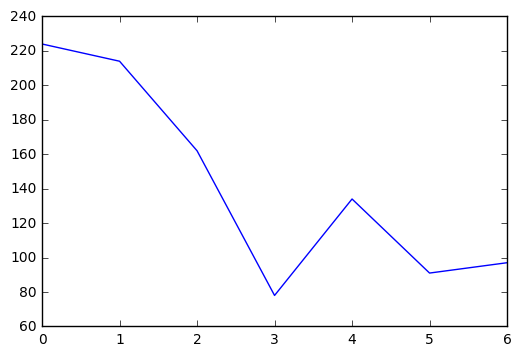

In [11]:
df.Opened.dt.weekday.value_counts().sort_index().plot()

In [12]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [13]:

df['Request Details'].value_counts()


Human Waste    1000
Name: Request Details, dtype: int64

In [14]:
df['Supervisor District'].value_counts().sort_index()



-1.0       1
 1.0      21
 2.0      27
 3.0     126
 4.0      11
 5.0      81
 6.0     444
 7.0       5
 8.0      81
 9.0     119
 10.0     66
 11.0     16
Name: Supervisor District, dtype: int64

In [15]:
df.Neighborhood.value_counts()

Tenderloin                 181
South of Market            167
Mission                    119
Civic Center                60
Lower Nob Hill              44
Potrero Hill                24
Lower Haight                22
Chinatown                   18
Downtown / Union Square     18
Inner Richmond              17
Showplace Square            17
Mission Dolores             17
North Beach                 15
Polk Gulch                  14
Castro                      14
Hayes Valley                14
Marina                      12
Haight Ashbury              11
Financial District          11
Duboce Triangle             11
Rincon Hill                 10
Bernal Heights              10
Mission Bay                 10
Eureka Valley                9
Nob Hill                     9
Outer Sunset                 9
Excelsior                    8
Mint Hill                    8
Dolores Heights              8
South Beach                  7
                          ... 
Portola                      4
Union St

In [16]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
3,6606485,2016-12-07 19:55:06,NaT,2016-12-07 19:55:06,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,"289 SAN JOSE AVE, SAN FRANCISCO, CA, 94110",8.0,Mission,"(37.750655078038, -122.42138846194)",Open311,NaN
11,6605677,2016-12-07 15:20:34,2016-12-07 16:00:20,2016-12-07 16:00:20,Closed,Case Resolved -,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,"401 ALABAMA ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.763566099551, -122.412057986203)",Voice In,NaN
12,6605657,2016-12-07 15:16:07,2016-12-07 16:10:16,2016-12-07 16:10:16,Closed,Case Resolved -,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of MARIPOSA ST and FLORIDA ST,9.0,Mission,"(37.7629728271067, -122.41120690382)",Voice In,NaN
25,6604892,2016-12-07 12:17:15,2016-12-07 12:55:09,2016-12-07 12:55:09,Closed,Case Resolved -,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of 17TH ST and FLORIDA ST,9.0,Mission,"(37.7642514416934, -122.411330111097)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58486e403da19793c74c2d47/report.jpg
32,6604407,2016-12-07 10:58:30,NaT,2016-12-07 10:58:30,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,"2761 16TH ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.765312317273, -122.414434026033)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58485bcb3da19793c74c27f0/report.jpg
37,6603700,2016-12-07 08:45:05,NaT,2016-12-07 08:45:05,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of 16TH ST and MISSION ST,9.0,Mission,"(37.7650512510466, -122.419669041689)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58483c853da19793c74c1fd3/photo_20161207_084354.jpg
57,6602438,2016-12-06 15:56:47,NaT,2016-12-06 15:56:47,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of 15TH ST and BRYANT ST,10.0,Mission,"(37.7669034554932, -122.41060974884)",Web Self Service,NaN
71,6601493,2016-12-06 12:20:55,NaT,2016-12-06 12:20:55,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Human Waste,Intersection of 15TH ST and HARRISON ST,9.0,Mission,"(37.766725305156, -122.413227026717)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58471d9b3da19793c74c0207/report.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [17]:
hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [18]:
#hl_images = df[df['Media URL'].notnull() ]

In [19]:
hl_images.head(4)

0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/58490d663da19793c74c3854/report.jpg
1     http://mobile311.sfgov.org/media/san_francisco/report/photos/584900d33da19793c74c3831/photo_20161207_223513.jpg
15    http://mobile311.sfgov.org/media/san_francisco/report/photos/58488e5a3da19793c74c313d/photo_20161207_143336.jpg
20                   http://mobile311.sfgov.org/media/san_francisco/report/photos/5848834a3da19793c74c2ffc/report.jpg
Name: Media URL, dtype: object

http://mobile311.sfgov.org/media/san_francisco/report/photos/58490d663da19793c74c3854/report.jpg


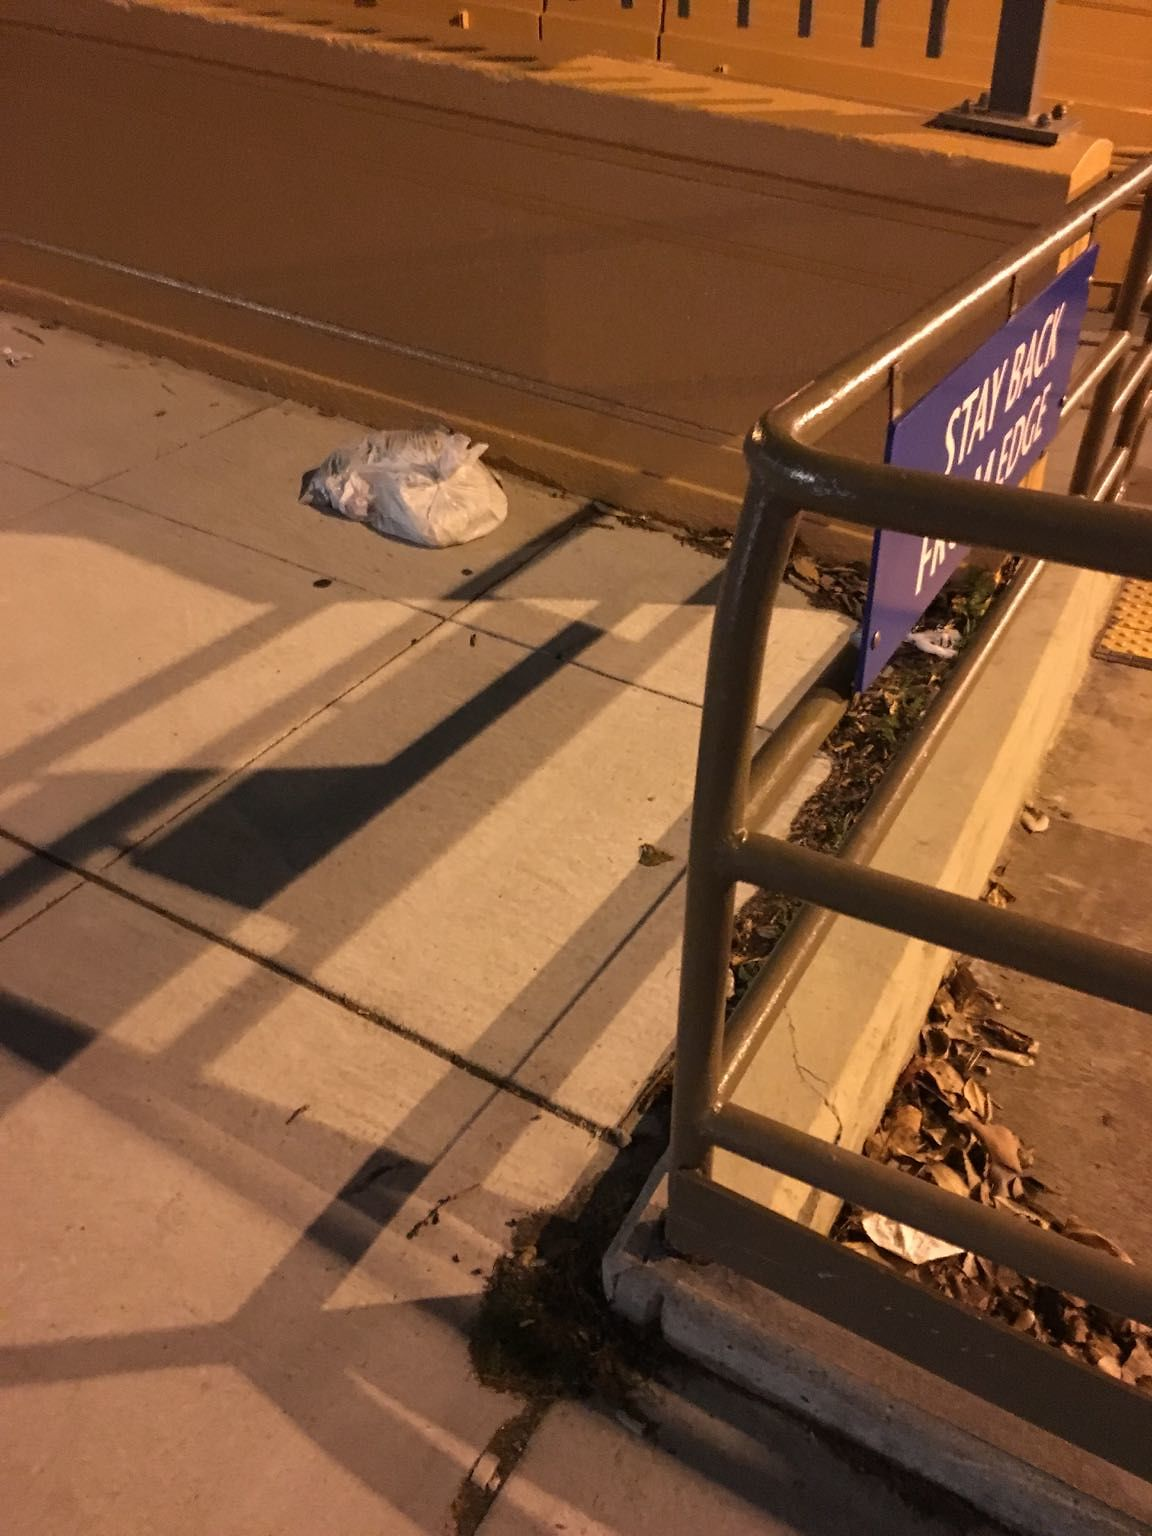

In [21]:
print(hl_images[0])
Image(hl_images[0])
